---
#More on Visualizations with Matplotlib
---

Last lecture we talked about the basic plots in matplotlib. Today, we'll go a bit deeper and talk about multiple plots within the same figure and a couple more different kinds of plots which you might find useful in your data science journey.

##Parts of a Figure

But before we do that, I wanted to take a quick detour and revisit the components of a Matplotlib `figure`.

![figure map](https://drive.google.com/uc?id=1V16I7qcfOCEeAwZdoVHzFr_mqkB4wlno)



###Figure
This is the **whole** figure. The figure keeps track of all the child [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), which is a smattering of 'special' artists: titles, figure legends, etc. A figure can contain any number of Axes objects, but will typically have at least one.

As we've seen in the last lecture, the easiest way to create a new figure is with pyplot:

<Figure size 640x480 with 0 Axes>

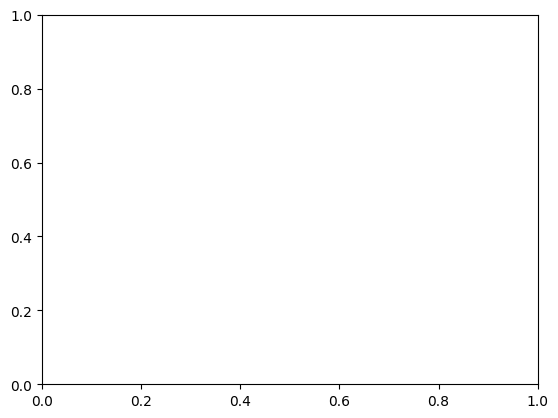

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes, we'll look at subplots in a bit
#fig, axs = plt.subplots(2, 2)  # a figure with 4 Axes (a 2x2 grid)

It's convenient to create the axes together with the figure, but you can also add axes later on, allowing for more complex axes layouts.

###Axes
This is what you think of as 'a plot'. It is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure). The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the [axes.Axes.set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib.axes.Axes.set_xlim) and [axes.Axes.set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim) methods). Each Axes has a title (set via [set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title)), an x-label (set via [set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel)), and a y-label set via [set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel)).

**The Axes class and its member functions are the primary entry point to working with Matplotlib's Object Oriented interface.**


###Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) object and the ticklabel strings are formatted by a [Formatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter). The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

## Subplots

Thus far we have been using a single `Axes` object to plot a single graph or figure. Sometimes it is useful to show two complex plots side by side for the viewer to compare. Matplotlib handles this with a single `figure()`.

Let's first set our rendering backend to be able to see the plots in jupyter notebook using `%matplotlib inline`, then import our `pyplot` module and `numpy`, as we'll need them both.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

If we look at the `.subplot()` documentation, we see that the first argument is the number of rows, the second the number of columns, and the third is the plot number.

In [3]:
plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

In matplotlib, a conceptual "grid" is overlayed on the figure. The `.subplot()` command allows you to create Axes on different portions of this grid.

For instance, if we want to to create two plots side by side, we would call subplot with the parameters 1, 2, and 1. This would allow us to use 1 row, with 2 columns, and *will both return and set the first Axes to be the current Axes*. By current Axes we mean the Axes which we will plot on.

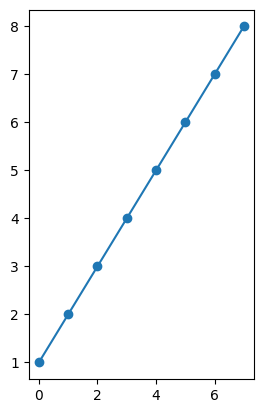

In [4]:
linear_data = np.array([1,2,3,4,5,6,7,8])

# subplot with 1 row, 2 columns, and set "current axes" to 1st subplot axes
plt.subplot(1, 2, 1)

plt.plot(linear_data, '-o')

Okay, great we've got a skinny plot on the left hand side. The second subplot on the right handside doesn't show, as we didn't plot it yet.

In order to do so, we call `.subplot()` again with the last parameter as a `2` to set the current Axes as the second, and plot new data to a plot on the right hand side.

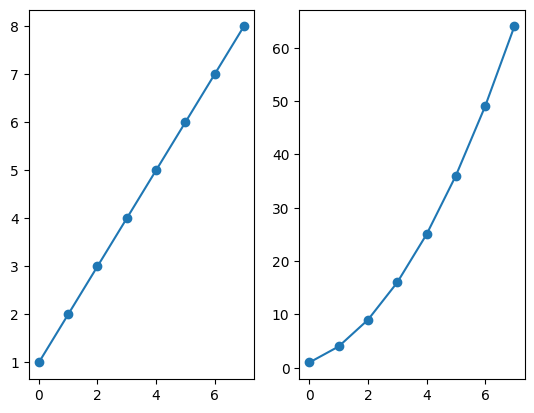

In [5]:
exponential_data = linear_data**2

# subplot with 1 row, 2 columns, and set current axes to 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

# subplot with 1 row, 2 columns, and set current axes to 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

Now we have two plots, each created with their own `Axes` object.

Note that you can also save the returned Axes as a variable when you call `subplot()`. That way you can recall the access anytime you want to plot new data points on it.

To show that, let's put `exponential_data` with the linear graph.

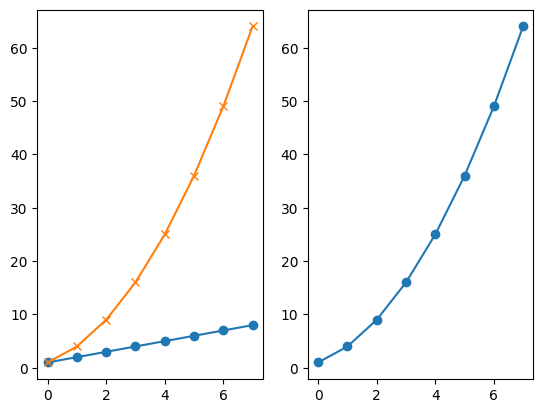

In [6]:
# subplot with 1 row, 2 columns, and "return" the current axes, ie 1st subplot axes
ax1 = plt.subplot(1, 2, 1)
ax1.plot(linear_data, '-o')

# subplot with 1 row, 2 columns, and "return" current axes, ie 2nd subplot axes
ax2 = plt.subplot(1, 2, 2)
ax2.plot(exponential_data, '-o')

# plot exponential data on 1st subplot axes
ax1.plot(exponential_data, '-x')

This demonstrates a common problem, it looked like linear had roughly the same area under the line on the chart until we asked matplotlib to put them into one graph. Then the y axis was refreshed.

There would be a big problem with misleading the reader if we didn't find a way to "lock" the axes between two plots. So, when you create a new subplot you might need to share the x, y, or both axes using the `sharex` and `sharey` parameters.

In order to do so, note that we had to create a subplot on the left-hand side and store it in `ax1`. After plotting that data we create the axis on the right-hand side, and we indicate explicitly that we want to share the y-axis, using the `sharey` parameter.

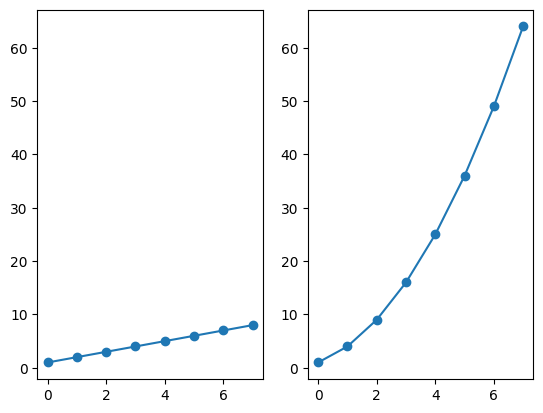

In [7]:
ax1 = plt.subplot(1, 2, 1)
ax1.plot(linear_data, '-o')

# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
ax2.plot(exponential_data, '-o')

The maplotlib developers allow you to specify the row, columns, and number of the plot that you want with either three parameters or a single parameter, where the hundreds value is the first argument, the tens is the second argument, and the ones is the third argument.

So in other words, `.subplot(1,2,1)` is equal to `.subplot(121)`.

I'm frankly not a big fan of this second syntax. It feels pretty hacky and it really only saves typing two commas. Also, if you decide to do 10 or more subplots, the second syntax doesn't work anymore, and would return an error. However, its useful to know in case you saw it on stackoverflow or any online forum.

Finally, let's say we wanted to create a three by three grid with all of the x and y axis ranges locked. There's this nice function called [`.subplots()`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) (note the plural) which allows you to get many Axes objects at once.

While the syntax might look a little long since we're unpacking the results of the `.subplots()` function directly, it's an effective way to build a grid where everything shares an axis.






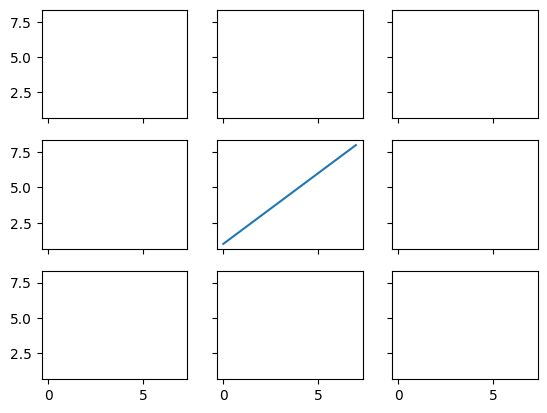

In [8]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes
ax5.plot(linear_data, '-')

Note that this method turns off the x and y ticks except for those subplots which are on the left hand side or the bottom of the figure. If you want to turn the ticks back on, you need to iterate through the Axes objects and do it yourself. You could do this directly through the Axes objects you have or iterate through all the Axes objects in the figure and change the x and y tick labels to be visible.

## Histograms

Next, I want to introduce you to a pretty fundamental data science chart, the histogram.

A histogram is a bar chart which shows the frequency of a given phenomena. A great example are probability distributions. We touched a little on the difference between the random, uniform, normal, and chi-squared distributions in the basic statistical analysis lecture.

Probability function can be visualized as a curve, where the y-axis holds the probability that a given value would occur, and the x-axis is the value itself. This is called a *probability density function*. The y-axis values are limited to between zero and one, where zero means there's no chance of a given value occurring and one means that the value will always occur. The x-axis values are labeled in terms of the distribution function. In the case of the normal distribution, this is usually in terms of standard deviations.

In other words, a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

Now, recall that sampling means that we just pick a number out of the distribution, like rolling a die or pulling a single card out of a deck. As we do this over and over again, we get a more accurate description of the distribution.

Let's pull some samples from the normal distribution and plot four different histograms as subplots. First let's create our 2 x 2 grid of Axes objects. In this case, we don't want to share the y-axis between the plots since we're intentionally looking at a number of different sizes of samples. We're mostly interested in how uniform the distribution looks. Then, we can iterate through a list of four different values, 10, 100, 1,000 and 10,000, and we'll pull samples from `np.random.normal()`. Remember that the normal function of random just creates a list of numbers based on the underlying normal distribution.

We can then plot these to a given Axes object using the `.hist()` function. Finally, let's not forget to set an appropriate title.

In [9]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
    Out

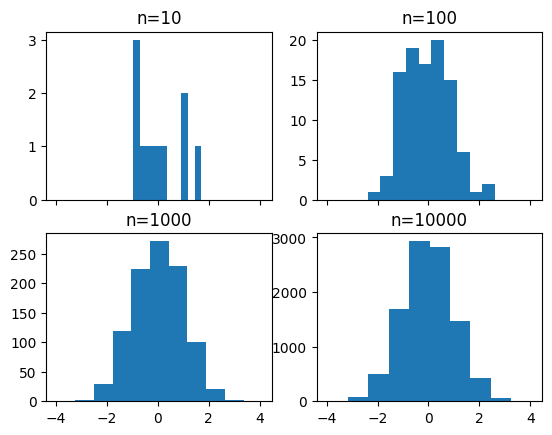

In [10]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

Looking at the resulting plots, the first plot only has ten samples, so it looks pretty jagged, and anyone would find it hard to state that this is a normal distribution. When we jump to 100 samples, it gets better, but still quite jagged. Then it seems to smooth out a bit on the plots for 1,000 and 10,000 samples.

But if we look closely, we can see that the bar of the 10,000 plots are actually wider than those of the 10 or the 100 plot. What's going on here?

By default, the histogram in matplotlib uses ten bins, that is ten different bars. Here we created a shared x-axis, and as we sample more from the distribution, we're more likely to get outlier values further from our mean. Thus, ten bins for n=10 is at best capturing ten unique values, while for n=10,000, many values have to be combined into a single bin.

Let's do the same function with the bin set to 100. Now we see that the 10,000 sampled plot looks much smoother than all of the others. And the 10 sample plot shows that each sample is basically in its own bin.

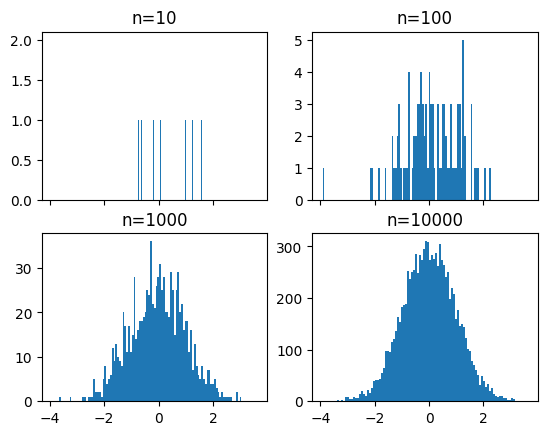

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

So this brings up an important question: how many bins you should plot when creating a histogram?

I'm afraid that the answer isn't really clear. Both of these plots are true, one is a visual of the data at a coarse granularity, and one at a more fine grain granularity. When we look at the finest granularity in our data, plotting with 10,000 bins then the histograms became basically useless for decision making. Since they aren't showing trends between samples as much as they're just showing the sample size themselves. This is similar to using aggregate statistics like the mean and standard deviation to describe a sample of a population. These values are coarse and whether they are appropriate depends highly on your questions and interests.

In the syllabus, I've linked an optional reading which considers the issue of how many bins are appropriate from a couple of different statistical stances. However, keep in mind this understanding that there's just no right or wrong, just useful and useless for a given need.

Moving on, I want to use our newfound knowledge of histograms and subplots to introduce you to a more flexible `GridSpec` layout for subplots. The `GridSpec` allows you to map Axes over multiple cells in a grid.

For instance, let's create a scatter plot where the y values come from the normal distribution, and the x values come from a random distribution.

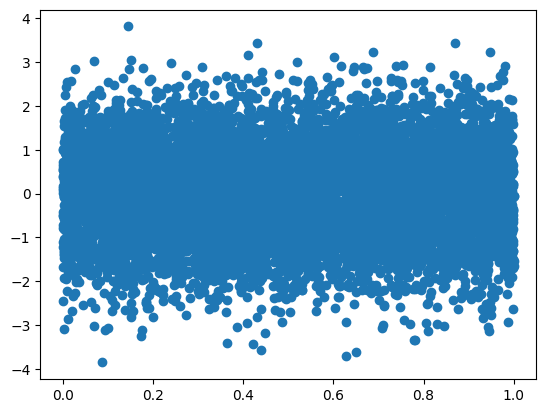

In [12]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

It's not totally clear from looking at this plot what the actual distributions are for each axis, but we could add two smaller plots, each histograms, to make this a bit more clear.

To do so, I'm going to define a 3x3 grid, nine cells in total. I want the first histogram to take up the top right space, and the second histogram to take up the far left bottom two spaces, rotated on its side. The original scatter plot can take up a two by two square in the bottom right.

To use the `GridSpec`, we first import it, then create a new `GridSpec` in the overall shape that we want. When we add new items with the subplot, instead of specifying the three numbers of row, column and position, we pass in the elements of the `GridSpec` object which we wish to cover. Note, however, that because we are using the elements of a list, all of the indexing starts at zero. As such, it is very reasonable to use slicing for the beginning or ends of lists.

The `GridSpec` is indexed as rows and columns using the indexing operator, or square brackets, `[]`. So we'll create the first subplot and histogram in row 0, skipping the first element, and starting from the middle position and going to the end of the row. We'll create the side_histogram starting in row 1, and continuing to the end of row elements, but limited to the 0 column.

Finally we'll create the scatter plot in the `lower_right` axes. When we execute this, we see our basic layout of the our set of plots.

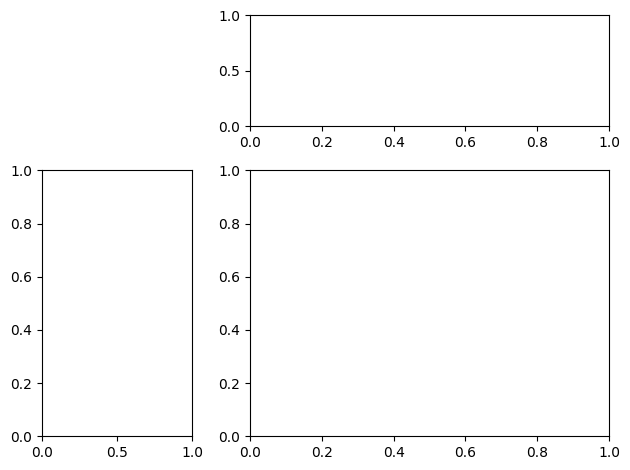

In [13]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

#tight_layout automatically adjusts the subplot parameters to give specified padding
#try commenting it out to see its effect
plt.tight_layout()

Now, let's fill this with some data. First the scatter plot, then the top histogram, which is for the x values, then the side histogram for the y values.

We want the side histogram to be lined up, we need to change the orientation of the historgram. There are actually a few ways of doing this, but since it's so common, matplotlib developers created an `orientation` parameter in the `hist()` function which we can set to horizontal.

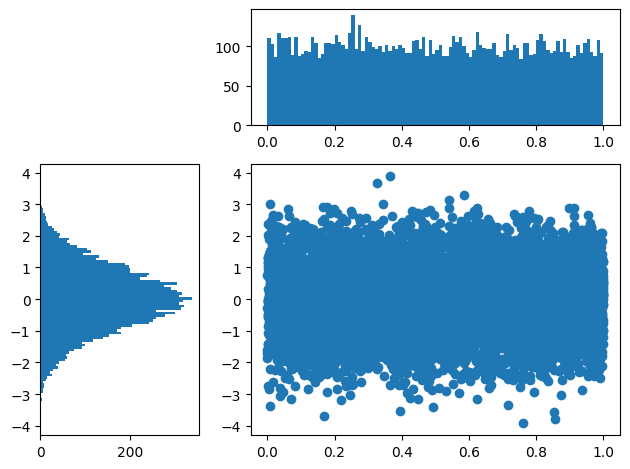

In [14]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal')

plt.tight_layout()

Okay, this is close. We don't really care about the value of the y-axes for the top histogram or the value of the x-axes for the bottom histogram. Since these are probability density histograms, we care only about the relative values.

In order to plot the relative values, we can call the `hist()` function with the `density=True` argument. This tells matplotlib to scale the frequency data in the histogram between 0 and 1.

We can flip the axes of the left-hand side histogram using the `invert_xaxis()` function.

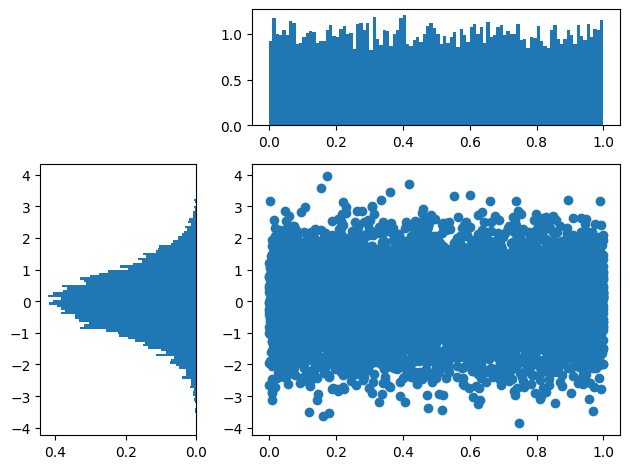

In [15]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)

top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

plt.tight_layout()

And there we go. We can see that our top histogram is uniform, and that the histogram for the y values indeed looks like the normal distribution.

## Box and Whisker Plots

A box plot, sometimes called a box-and-whisker plot is a method of showing aggregate statistics of various samples in a concise matter. The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of the samples, and the interquartile range (25th and 75th percentiles).

Let's create three different samplings from NumPy: one for the normal distribution, one for random, and one from a gamma distribution.

Next, let's put those in a pandas DataFrame. After all, much of the data we would actually process would come from pandas or another data manipulation toolkit and not from NumPy distribution functions.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                   'random': random_sample,
                   'gamma': gamma_sample})

Now we can use the pandas `.describe()` function to see some summary statistics about our dataframe. We can see that each row has 10,000 entries, and the mean values and standard deviation vary heavily. Then we see the minimal and maximum values along with three different percentage values.

In [17]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.003327,0.505281,2.010871
std,1.004328,0.289218,1.410697
min,-4.072369,0.000008,0.012118
25%,-0.672600,0.253598,0.974481
50%,-0.002957,0.508935,1.702657
75%,0.669893,0.752710,2.703679
max,3.995233,0.999896,13.687094


These percentage values make up what's called "*the interquartile range*". In descriptive statistics, the interquartile range tells you the spread of the middle half of your distribution.

Quartiles segment any distribution that’s ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.

![iqr_quartiles.png](https://drive.google.com/uc?id=19fnWPuOdyaSge6s5eq1MkDmRGEE3jff2)

Like standard deviation, the interquartile range is a measure of variability of data. It's common to plot this using a box plot. In a box plot, the median of the data is plotted as a straight line. Two boxes are formed, one above, representing the 50% to 75% data group, and one below, which represents the 25% to 50% data group. Thin lines, which are capped, are then drawn out to the minimum and maximum values.

Here's an example. Let's create a new figure by calling [`plt.boxplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) and pass in the column that we want to visualize. In matplotlib, data needs to conform to NumPy arrays, but since pandas is built on top of NumPy data points, this is easily done by simply projecting the column that we're interested in.

Finally, we set the `whis` parameter to be `[0,100]`. This tells the box plot to set the whisker values from the minimum to the maximum values.

Note that I assigned the output of the box plot function to a variable, an underscore. It's common practice by some to use an underscore when unpacking values which you don't care about and won't use later. Here, I am using it because if we don't assign the return value of the plotting function to a variable, Jupyter Notebook will assume that we wanted to print that output. Since plotting functions return a list of all of the artists plotted, this would really muddy up our display. However, some people don't mind that. So, it really is up to you whether you want to use this underscore pattern or not in your own code.

Another trick to suppress the output from being displayed is to add a semicolon at the end of the code.


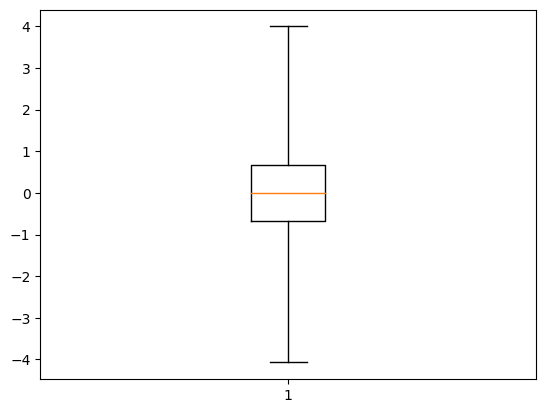

In [18]:
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis=[0,100])

Now let's add the other two samples to it. Unfortunately, we can't just pass a whole pandas dataframe to matplotlib. Instead, we need to pull out each column and send them in as a list of values.

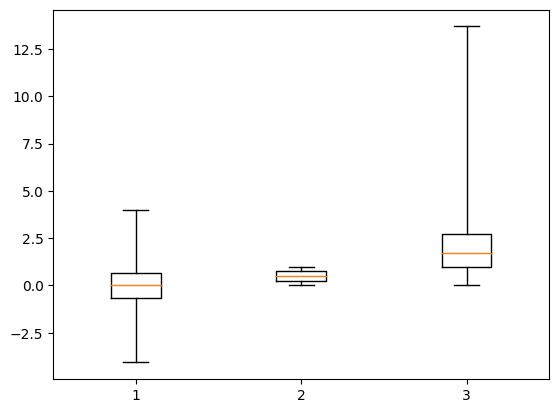

In [19]:
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])

All right, so this gives us our three distributions. Now, we didn't normalize the scale, so that's a little wonky. However, if we look at the gamma distribution, we see that the tail of it is very, very long; i.e. the maximum values are very far out.

Let's take a look at this distribution by itself in a histogram.

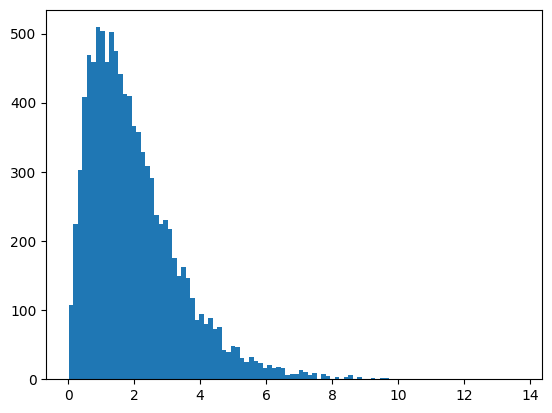

In [20]:
_ = plt.hist(df['gamma'], bins=100)

Interesting, we see it starts at a moderate level, spikes up, then drops off much more gradually and does indeed have a very long tail. Let's add this to our box plot to demonstrate something called inset axes.

Recall that we have one figure with one subplot. Since we didn't do anything fancy with subplots, that means we only have one Axes object.

We can actually overlay an Axes on top of another within a figure. Now, this functionality isn't in the basic matplotlib space, but it's in the `toolkits`. There are several different toolkits available, and while they tend to be packaged, they aren't considered core.

The toolkit that we're going to use is called the "axes grid", and we import it from the `mpl_toolkits.axes_grid1.inset_locator`.

Let's regenerate our box plot as before. Then, we just call the inset locator and pass it the current axes object we want to add an overlay axes on top of, followed by the size of our new axis. We can specify this as both a width and height percentage from the parent (bottom) axes. Finally, we tell it the location in which we want to drop the new axes. I'll put in position two here, which will place the axes in the upper left of the figure.

Now that we've set up the new Axis, we can push the histogram to it.

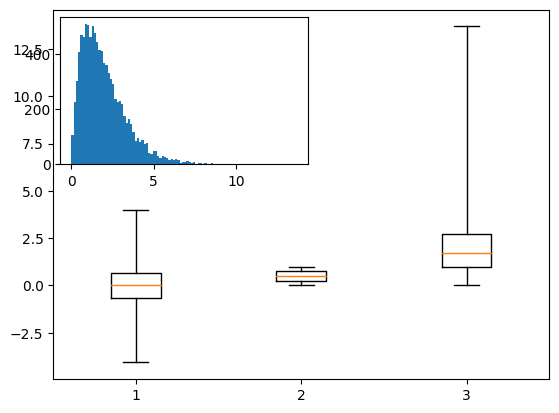

In [21]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])
# overlay axes on top of another
ax2 = mpl_il.inset_axes(plt.gca(), width='50%', height='40%', loc=2)
_ = ax2.hist(df['gamma'], bins=100)

Notice that we have a little bit of an overlap on the yaxis. We can easily fix it by accessing the `yaxis` of the plot and call `.tick_right()`.  

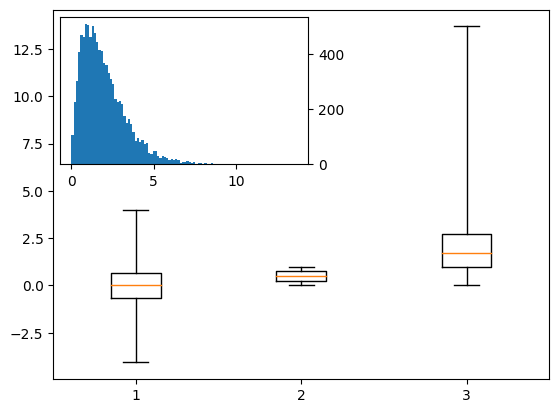

In [22]:
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])
# overlay axes on top of another
ax2 = mpl_il.inset_axes(plt.gca(), width='50%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)

# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

Now, the box plot has a few more functions which are worth investigating. First, if you don't supply the `whis` argument, the whiskers actually only go out to halfway between the interquartile range. You can figure that out through the top of the box minus the bottom of the box and times that value by 1.5.

This is one method of detecting outliers. The points which are plotted beyond the whiskers are called fliers. You can see here how this method of outlier detection differs with respect to our three distributions.

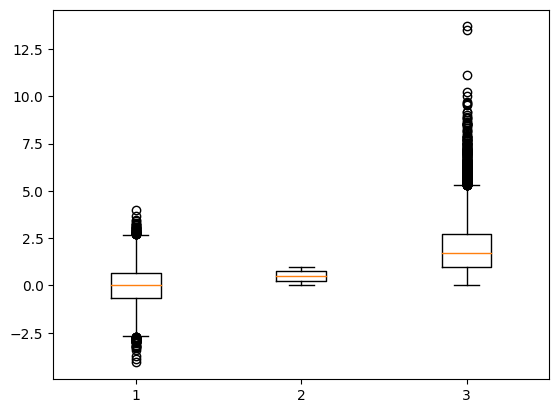

In [23]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ]);

The box plot is one of the more common plots that you might use as a data scientist, and matplotlib has significant support for different kinds of box plots. As such, the matplotlib's online documentation is key.

I've got one more plot to show you. A two dimensional histogram which is better known as a heat map.

## Heatmaps

Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions.

In all honesty, I was debating whether to include heatmaps in this course or not, as I've seen enough bad heatmaps to last me a lifetime. The problem is heatmaps are really quite powerful when you have the "right" data. Weather data is a great example, as you have two dimensions, latitude and longitude, and then we can overlay on top, say, temperature or amount of rainfall as a third dimension, and you use color to indicate its intensity.

Let's look at an example from the Australian Transportation Safety Bureau. It shows the probable location of the Malaysian Airlines Flight 370 which went missing in 2014. This probability is displayed as a continuous value, with cool colors (blues), being used for low probabilities and hot or warm colors (reds) being used for high probability.

![heatmap](https://drive.google.com/uc?id=1AWB9ZWRD_I9uc3du1vH4iudY9oGxAv3V)

So heatmaps aren't all bad. However, we need to understand that they make no sense when there's no continuous relationship between dimensions. Using a heatmap for categorical data, for instance, is just plain wrong. It could mislead the viewer into looking for patterns and ordering through spatial proximity, and any such patterns would be purely spurious.

Okay, now that we understand how to read heatmaps and when to use them, let's talk about the techniques. In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y values indicate potential points and the color plotted is the frequency of the observation.

Earlier, we talked about different statistical distributions and they work well for this demonstration. Let's define Y values to come from the normal distribution and X values to come from a random distribution. To plot this as a two-dimensional histogram, we just need to pass it to the `.hist2d()` function.

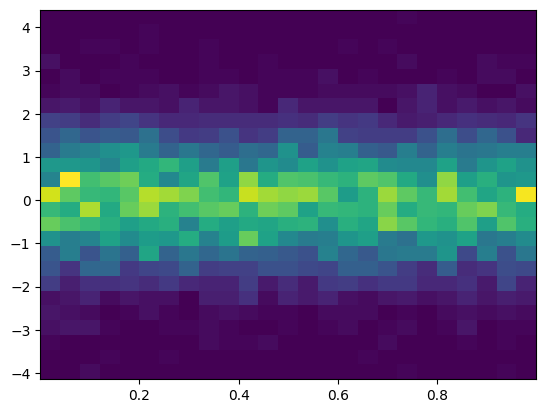

In [24]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

See how the edge colors on the top and the bottom are very dark purple, while there are greens and yellows in the middle horizon of the image.

Now we talked a bit about what happens when you increase or decrease the number of bins with regular histograms. How do you think this changes when using heatmaps?

As you increase the bins, you maintain the same effect, up to a certain point.

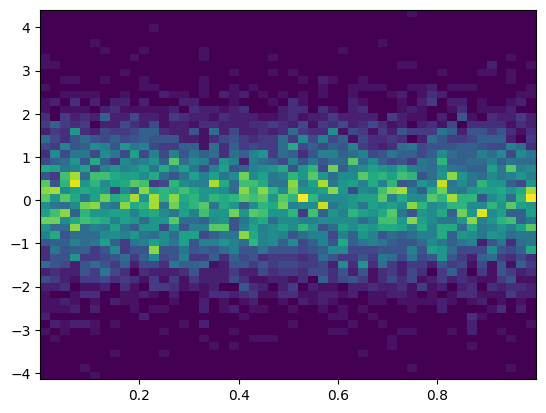

In [25]:
_ = plt.hist2d(X, Y, bins=50)

You will find that as you increase the bins, you will reach a point where every data point starts to fall into its own category. This will eventually lead to one color since every data point ends up being unique

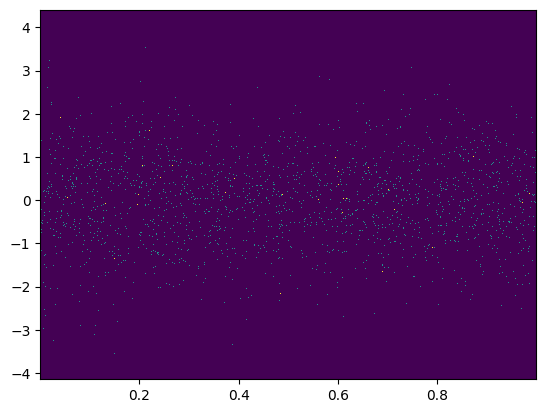

In [26]:
_ = plt.hist2d(X, Y, bins=1000)

Finally, we need to make sure that we include a legend in our heatmap. When using the pyplot scripting layer, this is as easy as calling the pyplot `.colorbar()` function.

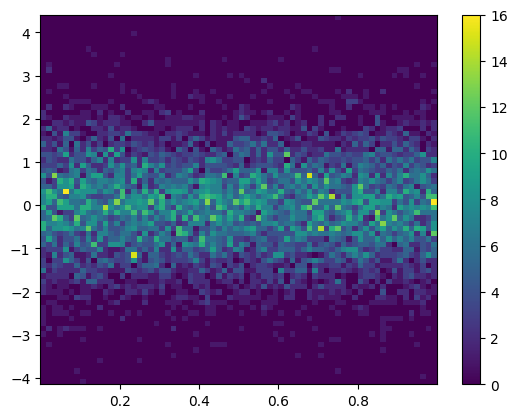

In [27]:
plt.hist2d(X, Y, bins=70)
# add a colorbar legend
_ = plt.colorbar()

Now that you've seen this data in two different ways: (1) a heatmap, where you have an X, a Y, and a color dimension, and (2) a scatterplot, with two histograms, one for each axis.

Which of these approaches do you see yourself using when you have density graphs that you want to share with others?